# Machine Learning in Agriculture

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score,classification_report

In [20]:
df_agri_train=pd.read_excel("train_agriculture.xlsx")
df_agri_test=pd.read_excel("test_agriculture.xlsx")
df_agri_train
df_agri_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


Here we find that we have two Data sets One is train data other is test data.

Our Target Column is Crop_Damage

In [21]:
# Lets Check the train data shape
df_agri_train.shape

(4599, 10)

In [22]:
# Lets Check the test data shape
df_agri_test.shape

(1199, 9)

In [23]:
#Lets check the keys in Train Data
df_agri_train.keys()

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [24]:
#Lets check the keys in Test Data
df_agri_test.keys()

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

We observed that the Crop_Damage is the target Column and is present in our Train Dataset.

We can count the Number of observations in Crop_Damage Data

In [25]:
df_agri_train['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [26]:
df_agri_train.isnull().sum()
df_agri_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

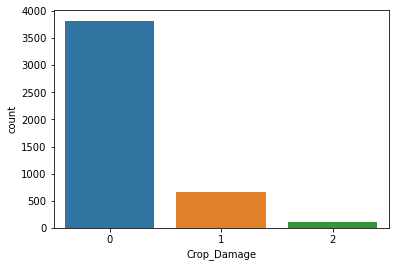

In [27]:
#lets chcek the count of target classes
sns.countplot(x="Crop_Damage",data=df_agri_train)
plt.show()


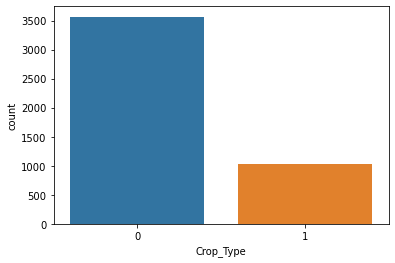

In [28]:
#Check Type of Crop
sns.countplot(x="Crop_Type",data=df_agri_train)
plt.show()

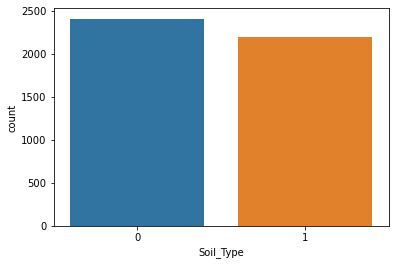

In [29]:
#Check Type of Soil
sns.countplot(x="Soil_Type",data=df_agri_train)
plt.show()

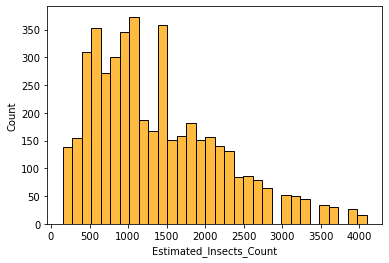

In [35]:
#Check Type of Soil
sns.histplot(data=df_agri_train, x="Estimated_Insects_Count",color=["orange"])
plt.show()

In the similer way we can test for Test data set

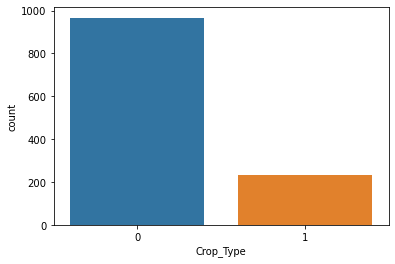

In [34]:
#Check Type of Crop
sns.countplot(x="Crop_Type",data=df_agri_test)
plt.show()

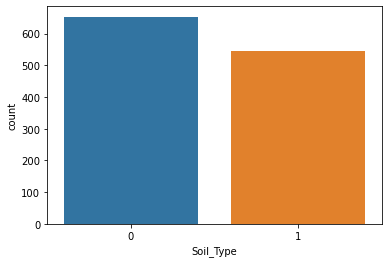

In [36]:
#Check Type of Crop
sns.countplot(x="Soil_Type",data=df_agri_test)
plt.show()

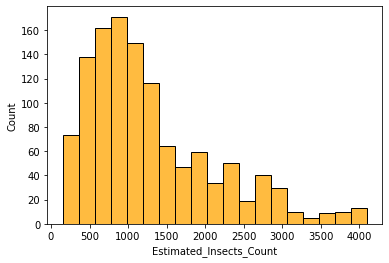

In [37]:
#Check Type of Soil
sns.histplot(data=df_agri_test, x="Estimated_Insects_Count",color=["orange"])
plt.show()

As from the histograms of both train and test data we observed that data is skewed on right side.

In [62]:
# join test and train data
df_agri_train['source']='train'
df_agri_test['source']='test'
df=pd.concat([df_agri_train,df_agri_test])

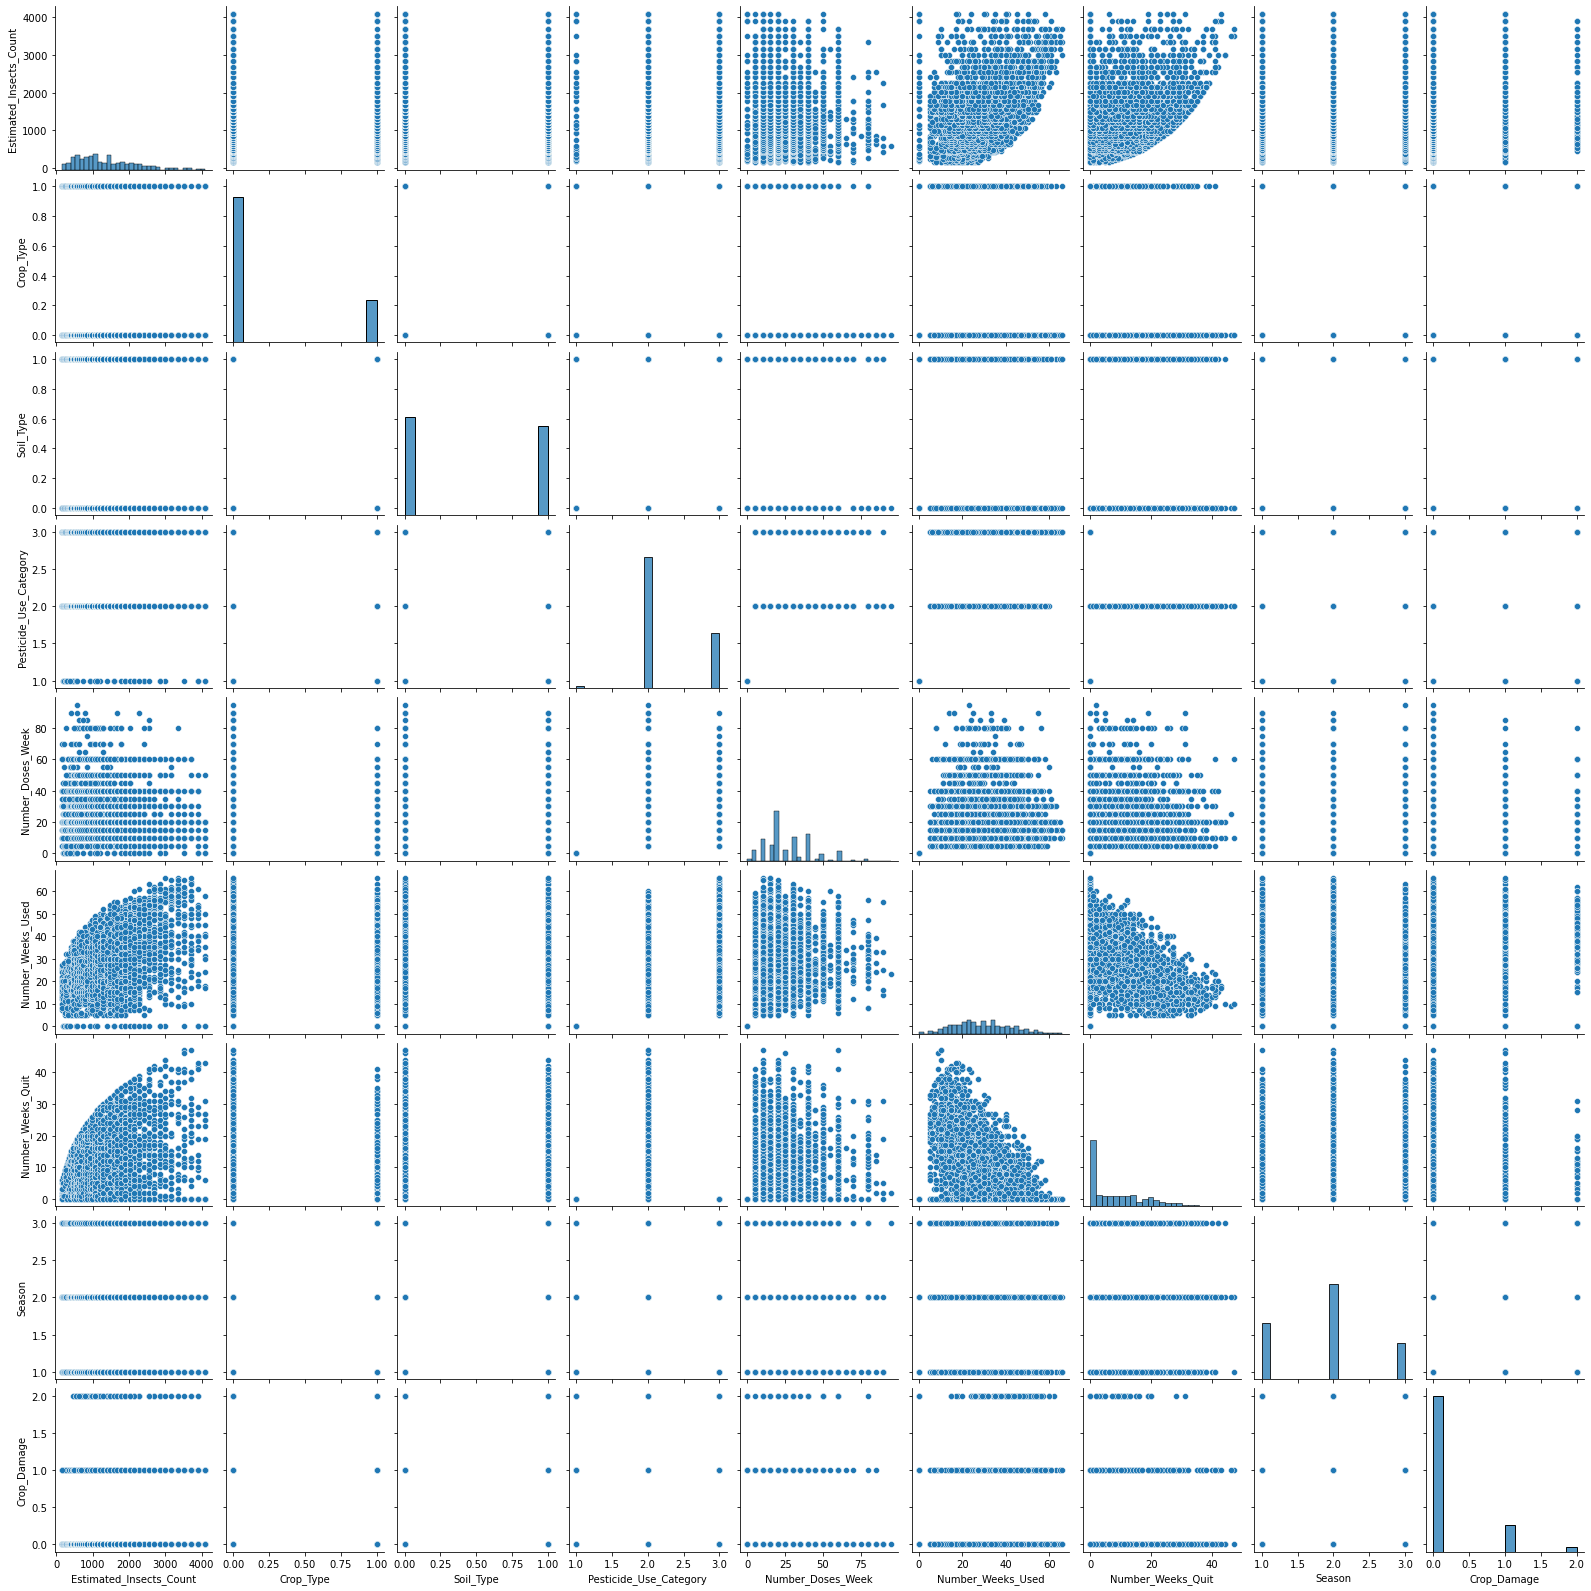

In [63]:
sns.pairplot(df_agri_train)
plt.show()

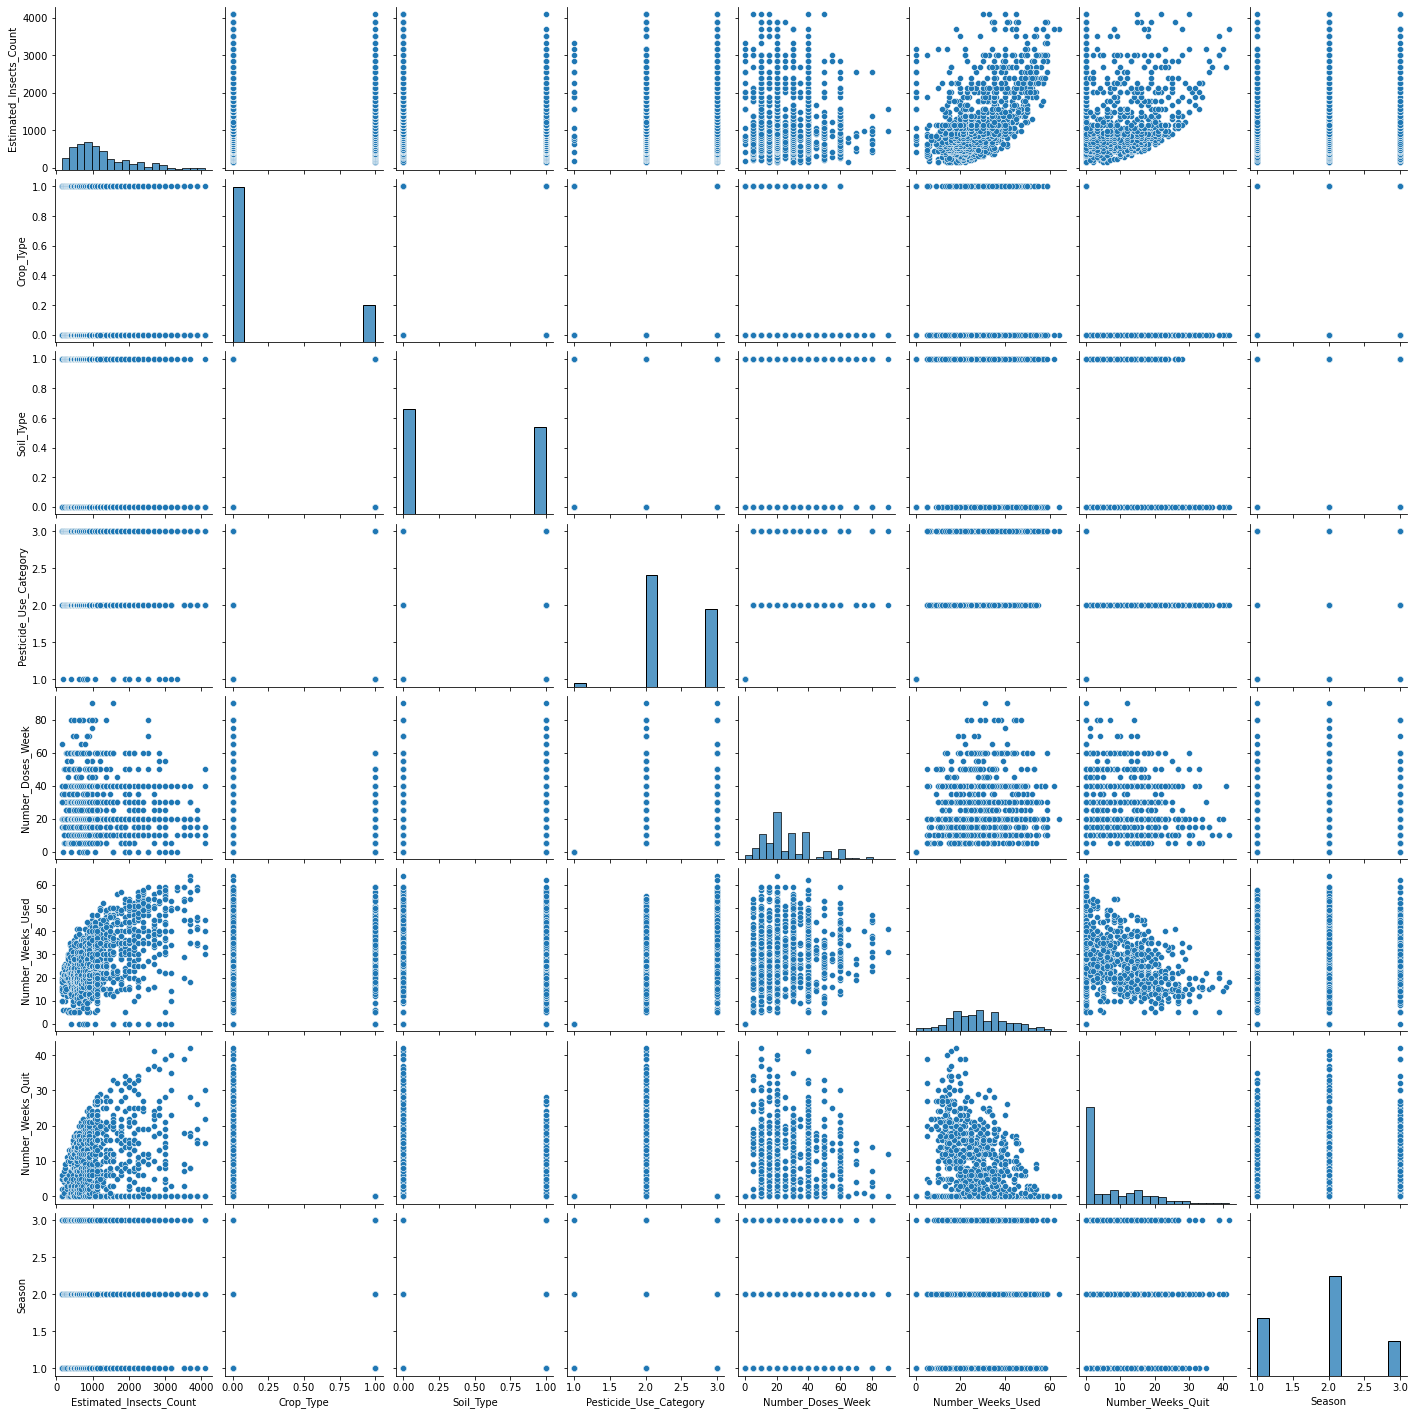

In [64]:
sns.pairplot(df_agri_test)
plt.show()

In [41]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3,NaN,test
1195,F00003135,1132,0,1,2,40,25.0,3,1,NaN,test
1196,F00003138,1132,0,1,2,20,13.0,23,1,NaN,test
1197,F00003149,1212,0,1,2,10,35.0,5,1,NaN,test


In [42]:
# Checking for Null values
df.isnull().sum()


ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
 10  source                   5798 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 543.6+ KB


In [57]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,4599.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,29.240669,8.760262,1.891687,0.194390
std,821.330403,0.413280,0.499271,0.484594,15.655508,11.641236,9.582781,0.692997,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,29.240669,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


We found that data has null values we can change it to the median or mode for column Number of weeks

In [58]:
df["Number_Weeks_Used"]=df["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].median())

In [55]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,4599.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,29.240669,8.760262,1.891687,0.194390
std,821.330403,0.413280,0.499271,0.484594,15.655508,11.641236,9.582781,0.692997,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,29.240669,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [59]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [71]:
df.shape

(5798, 11)

In [72]:
df.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.253129
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.306933
dtype: float64

In [80]:
#we need to treat the skewness
import numpy as np
for index in df.drop(columns=["Crop_Damage"]).skew().index:
    if df.drop(columns=["Crop_Damage"]).skew().loc[index] > 0.75:
        df[index]=np.log1p(df[index])

After treating with skewness 

In [79]:
df.skew()

Estimated_Insects_Count   -0.451164
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week         -1.263559
Number_Weeks_Used          0.253129
Number_Weeks_Quit         -0.117645
Season                     0.147252
Crop_Damage                2.306933
dtype: float64